UCI SECOM data analysis

##### Systematic approach to Feature selection, Reducing feature dimensionality while maintaining model performance. 

**Methodology**

- Duplicate Column Removal: Eliminating redundant features to create a cleaner dataset

- Variance Threshold: Removing features with low variance that contribute minimal information

- Correlation Analysis: Identifying and addressing multicollinearity through correlation matrix analysis

- ANOVA Testing: Selecting features with the strongest statistical relationship to the target variable

**Results**

The results demonstrate the effectiveness of feature selection approach:

- Original Model (592 features): Test accuracy of 0.904 (90.4%)
- Optimized Model (20 features): Test accuracy of 0.908 (90.8%)

    - Achieved a 96.6% reduction in feature dimensionality while slightly improving model performance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('uci-secom.csv', sep=',')    

- 데이터 저장 위치 확인
- csv파일 데이터 구분자(",", "\t", "|")
- 데이터가 데이터베이스나 클라우드상에 저장된 경우, 데이터베이스나 클라우드와 연결할 수 있는 라이브러리를 사용

### 데이터 유형, 내용 전체적인 확인

In [ ]:
print(df.shape)
print(df.info())

(1567, 592)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1
1566,2008-10-17 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,...,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,-1


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### 값 확인 & 계산

In [6]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
df.tail()

In [ ]:
df[["Time", "Pass/Fail"]]

,Time,Pass/Fail
0,2008-07-19 11:55:00,-1
1,2008-07-19 12:32:00,-1
2,2008-07-19 13:17:00,1
3,2008-07-19 14:43:00,-1
4,2008-07-19 15:22:00,-1
...,...,...
1562,2008-10-16 15:13:00,-1
1563,2008-10-16 20:49:00,-1
1564,2008-10-17 05:26:00,-1
1565,2008-10-17 06:01:00,-1


In [ ]:
df[:10]

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


In [ ]:
df[-5:]

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1
1566,2008-10-17 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,...,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,-1


In [ ]:
df[-5:][["Time", "Pass/Fail"]]

,Time,Pass/Fail
1562,2008-10-16 15:13:00,-1
1563,2008-10-16 20:49:00,-1
1564,2008-10-17 05:26:00,-1
1565,2008-10-17 06:01:00,-1
1566,2008-10-17 06:07:00,-1


### 데이터 전처리: 결측치 확인

In [ ]:
df.isnull().sum()/len(df)*100

Time         0.000000
0            0.382897
1            0.446713
2            0.893427
3            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 592, dtype: float64

In [13]:
df.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [ ]:
df.fillna(0, inplace=True)

### 머신러닝

In [15]:
# 머신러닝 라이브러리리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
X = df.drop(['Pass/Fail','Time'], axis=1)
y = df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)

(1253, 590)
(314, 590)


Training the Model with 590 Features

In [18]:
log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9044585987261147


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Removing Duplicate Columns

In [19]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [20]:
duplicate_columns = get_duplicate_columns(X_train)
duplicate_columns

{'13': ['52',
  '97',
  '141',
  '149',
  '178',
  '179',
  '186',
  '189',
  '190',
  '191',
  '192',
  '193',
  '194',
  '226',
  '229',
  '230',
  '231',
  '232',
  '233',
  '234',
  '235',
  '236',
  '237',
  '240',
  '241',
  '242',
  '243',
  '256',
  '257',
  '258',
  '259',
  '260',
  '261',
  '262',
  '263',
  '264',
  '265',
  '266',
  '276',
  '284',
  '313',
  '314',
  '315',
  '322',
  '325',
  '326',
  '327',
  '328',
  '329',
  '330',
  '364',
  '369',
  '370',
  '371',
  '372',
  '373',
  '374',
  '375',
  '378',
  '379',
  '380',
  '381',
  '394',
  '395',
  '396',
  '397',
  '398',
  '399',
  '400',
  '401',
  '402',
  '403',
  '404',
  '414',
  '422',
  '449',
  '450',
  '451',
  '458',
  '461',
  '462',
  '463',
  '464',
  '465',
  '466',
  '481',
  '498',
  '501',
  '502',
  '503',
  '504',
  '505',
  '506',
  '507',
  '508',
  '509',
  '512',
  '513',
  '514',
  '515',
  '528',
  '529',
  '530',
  '531',
  '532',
  '533',
  '534',
  '535',
  '536',
  '537',
  '538

In [21]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [22]:
print(X_train.shape)
print(X_test.shape)

(1253, 479)
(314, 479)


Variance Threshold

In [23]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [24]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [25]:
sum(sel.get_support())

np.int64(299)

In [26]:
columns = X_train.columns[sel.get_support()]
columns

Index(['0', '1', '2', '3', '4', '5', '6', '12', '14', '15',
       ...
       '570', '571', '572', '573', '574', '576', '577', '581', '585', '589'],
      dtype='object', length=299)

In [27]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [28]:
print(X_train.shape)
print(X_test.shape)

(1253, 299)
(314, 299)


Correlation

<Axes: >

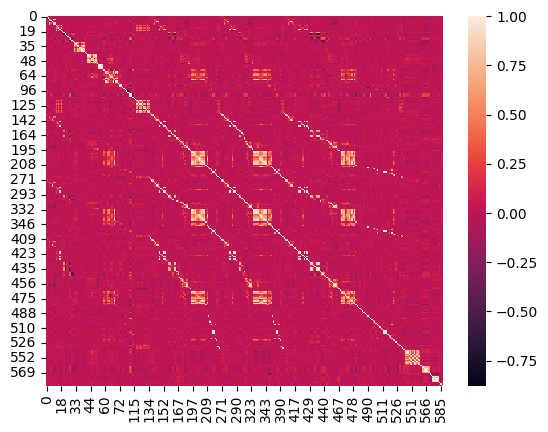

In [30]:
sns.heatmap(X_train.corr())

In [31]:
corr_matrix = X_train.corr()

In [32]:
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

175


In [33]:
columns_to_drop = set(columns_to_drop)
len(columns_to_drop)

107

In [34]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(1253, 192)
(314, 192)


ANOVA

In [36]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]

Index(['21', '22', '28', '33', '59', '64', '72', '112', '125', '129', '160',
       '164', '197', '200', '316', '430', '431', '434', '510', '519'],
      dtype='object')

In [37]:
columns = X_train.columns[sel.get_support()]

In [38]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [39]:
print(X_train.shape)
print(X_test.shape)

(1253, 20)
(314, 20)


In [40]:
X_train.head()

,21,22,28,33,59,64,72,112,125,129,160,164,197,200,316,430,431,434,510,519
0,-5679.00,2707.00,68.1778,8.6915,8.3018,11.6982,143.1203,0.4633,1.0350,-0.2365,420.0,0.079,13.57,18.70,5.0896,7.8535,15.5153,9.9193,37.8517,6.1961
1,-5525.25,2653.50,71.9444,8.7932,-3.7536,23.7536,0.0000,0.0000,0.9318,-1.5600,290.0,0.041,19.69,20.96,6.4957,28.0892,10.9290,10.3733,19.4211,0.0000
2,-5595.75,2789.25,67.2444,8.5360,-3.0900,23.0900,137.0271,0.4627,1.1910,-0.2838,266.0,0.084,20.12,15.22,6.9241,14.6718,9.5366,4.3160,46.5649,2.7931
3,-4490.50,2320.25,63.6000,9.1784,15.9527,24.0473,153.9723,0.4673,1.0500,-0.6150,3253.0,1.801,14.46,13.73,6.4035,171.6735,140.2004,136.3324,31.6049,6.3504
4,-6401.25,3096.75,71.0000,9.4832,22.1027,17.8973,145.0587,0.4714,1.0640,0.2365,621.0,0.097,17.81,19.29,5.8781,9.0920,20.0533,13.7432,60.0791,8.1756


Training the Model with 20 Features

In [41]:
log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9076433121019108


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Conclusion
**Key Takeaways**

Power of effective feature selection in improving model performance while simplifying complexity. 

Starting with a high-dimensional dataset of 592 columns, I applied a structured process combining:

**Variance Thresholding** : To eliminate low-variance features.

**Correlation Analysis** : To remove redundant features with high linear dependence.

**ANOVA** : To retain only the most relevant features.
After feature selection, I reduced the dataset to the top 20 features, achieving a marginal increase in test accuracy from 90.45% to 90.76%. This improvement underscores the importance of dimensionality reduction in optimizing both the efficiency and performance of machine learning models.

##### Looking Ahead
Moving forward, further experimentation with other feature selection methods, such as recursive feature elimination or LASSO regularization, could yield even more insights.